# L02- Converting and Deploying AI Models using TensorFlow Lite
### Option B - Practical 

### Part 1: Setting Up the Development Environment
#### Step 1: Verify Python and TensorFlow Installation

In [3]:
!python --version 

Python 3.12.7


In [4]:
!pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\banke\anaconda3\Lib\site-packages
Requires: tensorflow-intel
Required-by: 


In [5]:
!pip install tensorflow


### Part 2: Creating and Training an AI Model
#### Step 3: Load the MNIST Dataset

In [7]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.datasets import mnist 
import numpy as np 
import matplotlib.pyplot as plt 

In [8]:
# Load MNIST dataset 
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

# Normalize data (scale pixel values between 0 and 1) 
x_train, x_test = x_train / 255.0, x_test / 255.0 

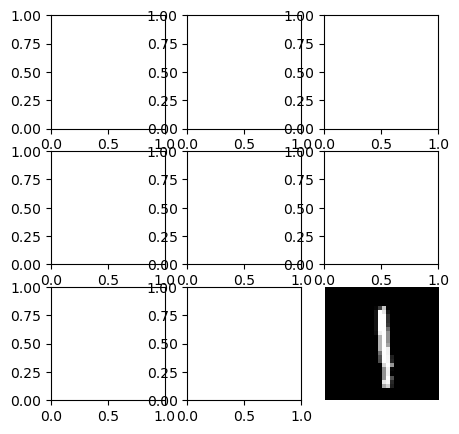

In [9]:
# Show sample images 
plt.figure(figsize=(5,5)) 
for i in range(9): plt.subplot(3,3,i+1) 
plt.imshow(x_train[i], cmap="gray") 
plt.axis('off') 
plt.show()

#### Step 4: Define and Train a Neural Network
##### Create a simple feedforward neural network using Keras:

In [11]:
# Define model architecture 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),  # Input layer 
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(10, activation='softmax') # Output layer (10 classes)
])

In [12]:
# Compile model 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 


In [13]:
# Train model 
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test)) 


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8757 - loss: 0.4398 - val_accuracy: 0.9590 - val_loss: 0.1415
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9642 - loss: 0.1233 - val_accuracy: 0.9699 - val_loss: 0.1016
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9773 - loss: 0.0777 - val_accuracy: 0.9718 - val_loss: 0.0929
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9824 - loss: 0.0576 - val_accuracy: 0.9758 - val_loss: 0.0793
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9873 - loss: 0.0442 - val_accuracy: 0.9745 - val_loss: 0.0826


In [14]:
# Save trained model 
model.save("mnist_model.keras", include_optimizer=False)

In [15]:
print("Model training complete and saved as mnist_model.keras")

Model training complete and saved as mnist_model.keras


### Part 3: Converting and Saving the Model
#### Step 5: Convert the Model to TensorFlow Lite Format

In [17]:
# Load trained model 
model = tf.keras.models.load_model("mnist_model.keras") 

In [18]:
# Convert to TensorFlow Lite 
converter = tf.lite.TFLiteConverter.from_keras_model(model) 
tflite_model = converter.convert() 


INFO:tensorflow:Assets written to: C:\Users\banke\AppData\Local\Temp\tmpsqyle83q\assets


INFO:tensorflow:Assets written to: C:\Users\banke\AppData\Local\Temp\tmpsqyle83q\assets


Saved artifact at 'C:\Users\banke\AppData\Local\Temp\tmpsqyle83q'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(32, 28, 28), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(32, 10), dtype=tf.float32, name=None)
Captures:
  1812514052944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1812514047952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1812514048528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1812514051600: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [19]:
# Save the converted model 
with open("mnist_model.tflite", "wb") as f: 
    f.write(tflite_model)     

In [20]:
print("Model successfully converted and saved as mnist_model.tflite")

Model successfully converted and saved as mnist_model.tflite


### Part 4: Loading and Running Inference with TensorFlow Lite
#### Step 6: Load the Converted Model Using TensorFlow Lite Interpreter

In [22]:
# Load TensorFlow Lite model 
interpreter = tf.lite.Interpreter(model_path="mnist_model.tflite") 
interpreter.allocate_tensors() 

In [23]:
# Get input and output tensor details 
input_details = interpreter.get_input_details() 
output_details = interpreter.get_output_details() 


In [24]:
print("Input Details:", input_details)

Input Details: [{'name': 'serving_default_input_layer:0', 'index': 0, 'shape': array([32, 28, 28]), 'shape_signature': array([32, 28, 28]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [25]:
print("Output Details:", output_details)

Output Details: [{'name': 'StatefulPartitionedCall_1:0', 'index': 9, 'shape': array([32, 10]), 'shape_signature': array([32, 10]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


#### Step 7: Perform Inference with TensorFlow Lite

In [27]:
# Select a test image 
test_image = x_test[0].astype(np.float32) 

In [28]:
# Ensure data type matches model input
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension (1, 28, 28)
test_image = np.tile(test_image, (32, 1, 1))  # (32, 28, 28)
# Convert to float32 (required for TensorFlow Lite)
test_image = test_image.astype(np.float32)

In [29]:
print("Expected input shape:", input_details[0]['shape'])

Expected input shape: [32 28 28]


In [30]:
# Set the input tensor 
interpreter.set_tensor(input_details[0]['index'], test_image)

In [31]:
# Run inference 
interpreter.invoke() 

In [32]:
# Get the prediction 
output_data = interpreter.get_tensor(output_details[0]['index']) 
predicted_label = np.argmax(output_data)

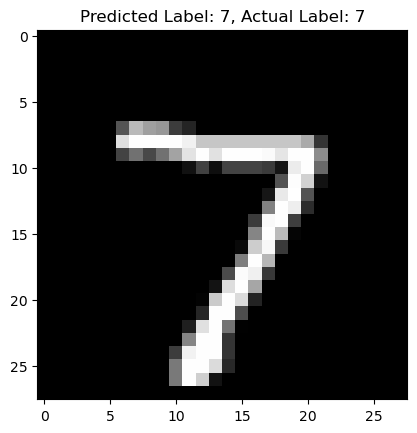

In [33]:
# Display the image and prediction 
plt.imshow(x_test[0], cmap="gray") 
plt.title(f"Predicted Label: {predicted_label}, Actual Label: {y_test[0]}") 
plt.show()